# Telco Churn

A classification project

## Imports

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import sklearn.preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings("ignore")

from scipy import stats


import wrangle as w
import explore as e
#import modeling as m

## Acquire

* Data acquired from the Codeup mySQL server on October 26, 2022
* It contained 7043 rows and 24 columns
* Each observation represents a Telco customer
* Each column represents a feature of those customers

In [2]:
#import unclean data from Codeup mySQL server
telco_unclean = w.get_telco_data()

## Prepare

* Checked for duplicate rows (there were none)
* Removed duplicate columns (payment_type_id', 'internet_service_type_id', 'contract_type_id', 'customer_id')
* Checked for nulls in the data (there were none)
* Checked that column data types were appropriate
* Noticed "total_charges" was listed as an object so researched why and found some customers have spaces (" ")
* Dropped those customers whose total_charges are spaces (these customers are new customers (tenure=0 and churn=No)), then converted to a float
* Encoded target variable, churn, as 'churn_encoded' {'Yes': 1, 'No': 0}, then dropped 'churn' column
* Split data into train, variable, and test (65/20/15)
* Outliers have not been removed for this iteration of the project

### Data dictionary
| Feature | Definition | Values |
|:--------|:-----------|:-------
|gender| The customer's gender| Male or Female|
|senior_citizen| Is this customer a senior citizen?| {'Yes': 1, 'No': 0} |
|partner| Does this person live with a partner?|'Yes' or 'No'|
|dependents| Does this person live with dependents?| 'Yes' or 'No'|
|tenure| The number of **months** a customer has been with the company| *int* |
|phone_service| Does this person subscribe to phone service?| 'Yes', 'No'|
|multiple_lines| Does this person have multiple phone lines?| 'Yes', 'No', 'No phone service'|
|online_security| Does this person subscribe to online security?| 'Yes', 'No', 'No internet service'|
|online_backup| Does this person subscribe to online backup?| 'Yes', 'No', 'No internet service'
|device_protection| Does this person subscribe to device protection?| 'Yes', 'No', 'No internet service'
|tech_support| Does this person subscribe to tech support?| 'Yes', 'No', 'No internet service'
|streaming_tv| Does this person subscribe to streaming TV?| 'Yes', 'No', 'No internet service'
|streaming_movies| Does this person subscribe to streaming movies?| 'Yes', 'No', 'No internet service'
|paperless_billing| Does this person use paperless billing?| 'Yes', 'No'
|monthly_charges| The amount a customer is currently charged per month| *float* |
|total_charges| The amount a customer has been charged since becoming a customer| *float* |
|contract_type| The length of contract the customer currently has| 'Month-to-month', 'One-year', or 'Two-year'|
|internet_service_type| Type of internet service | 'DSL', 'Fiber', 'None'|
|payment_type| The way the customer pays their bill. |'Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'
|**Target variable**
|churn_encoded| Did the customer leave the company? | {'Yes': 1, 'No': 0}|

In [3]:
#clean the data to prep for exploration
telco = w.clean_telco(telco_unclean)

# splitting data into train, validate, and test
train, validate, test = w.train_validate_test_split(telco, "churn_encoded")

### A look at the data

In [4]:
#show the first few rows of the train data
train.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,churn_encoded
22,Female,0,Yes,Yes,23,Yes,Yes,No,No,No,No,Yes,No,Yes,83.75,1849.95,Month-to-month,Fiber optic,Electronic check,0
4999,Male,1,No,No,47,Yes,Yes,No,Yes,No,Yes,No,No,No,59.60,2754.00,Two year,DSL,Bank transfer (automatic),0
2563,Female,0,No,No,19,No,No phone service,No,Yes,No,No,No,Yes,Yes,39.70,710.05,Month-to-month,DSL,Electronic check,0
5501,Female,0,No,No,28,No,No phone service,No,No,Yes,Yes,No,No,Yes,35.75,961.40,Month-to-month,DSL,Mailed check,0
4344,Male,1,Yes,No,41,No,No phone service,No,Yes,Yes,No,Yes,Yes,Yes,53.95,2215.40,Month-to-month,DSL,Electronic check,0


### Data summary

In [5]:
#look at data statistics
train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gender,4572,2,Male,2325,NaN,NaN,NaN,NaN,NaN,NaN,NaN
senior_citizen,4572.0,NaN,NaN,NaN,0.163823,0.370156,0.0,0.0,0.0,0.0,1.0
partner,4572,2,No,2390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dependents,4572,2,No,3195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,4572.0,NaN,NaN,NaN,32.479221,24.626046,1.0,9.0,29.0,56.0,72.0
phone_service,4572,2,Yes,4132,NaN,NaN,NaN,NaN,NaN,NaN,NaN
multiple_lines,4572,3,No,2205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_security,4572,3,No,2273,NaN,NaN,NaN,NaN,NaN,NaN,NaN
online_backup,4572,3,No,2006,NaN,NaN,NaN,NaN,NaN,NaN,NaN
device_protection,4572,3,No,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Explore

* Here you will explore your data then highlight 4 questions that you asked of the data and how those questions influenced your analysis
* Remember to split your data before exploring how different variables relate to one another
* Each question should be stated directly 
* Each question should be supported by a visualization
* Each question should be answered in natural language
* Two questions must be supported by a statistical test, but you may choose to support more than two
* See the following example, and read the comments in the next cell

**The following empty code block** is here to represent the countless questions, visualizations, and statistical tests 
that did not make your final report. Data scientist often create a myriad of questions, visualizations 
and statistical tests that do not make it into the final notebook. This is okay and expected. Remember 
that shotgun approaches to your data such as using pair plots to look at the relationships of each feature 
are a great way to explore your data, but they have no place in your final report. 
**Your final report is about showing and supporting your findings, not showing the work you did to get there!**

In [6]:
#split data for exploration into a dataframe that shows all info on those who churned
train_churn = train[train.churn_encoded == 1]

#and a dataframe that show all info on those who didn't churn
train_no_churn = train[train.churn_encoded == 0]

### 1. What percentage of our customers have churned?

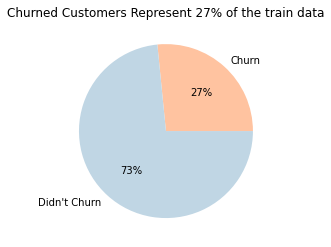

In [7]:
#show percentage of customers who churned from the train data
e.churn_percentage(train)

**A little over 1/4 of customers in the training data churn.**

## Does a customer's tenure affect churn? :

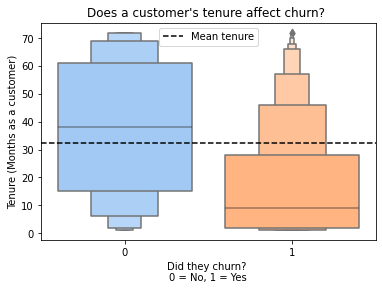

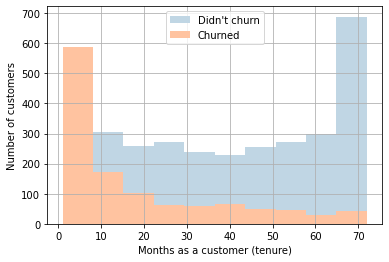

In [8]:
#plot tenure of those who churned and didn't churn
e.tenure_viz(train)

**It looks like those who have been a customer a shorter amount of time churn more**

**In order to confirm this prediction, I will now do a T-test to test for a significant difference between tenure of those who churn and don't churn**
* My confidence interval is 95%
* Resulting alpha is .05

In [9]:
alpha = 0.05

**To run a T-test we have to check our assumptions**
* **Independent:** Yes. Two separate groups churn and no_churn
* **Normal distribution:** Yes. Enough observations
* **Equal variances:** Check $\Downarrow$

In [10]:
stats.levene(train_churn.tenure, train_no_churn.tenure)

LeveneResult(statistic=279.0983604857994, pvalue=7.303234343977914e-61)

pvalue < alpha so they are NOT equal and we must use equal_var = False

**Set Hypothesis**

$H_0$ = There is no difference in tenure between those who churn and don't churn 

$H_a$ = There is a difference in tenure between those who churn and don't churn 

In [11]:
tstat, p = stats.ttest_ind(train_churn.tenure, train_no_churn.tenure, equal_var= False)

In [12]:
if (p < alpha):
    print(f"tstat: {tstat}\np-value: {p}\np < alpha, so we can reject the null hypothesis and say there is probably a difference in tenure between those who churn and don't churn.")
else:
    print(f"tstat: {tstat}\np-value: {p}\np > alpha, so we fail to reject the null hypothesis and say there is no difference in tenure between those who churn and don't churn.")

tstat: -29.127546311454513
p-value: 6.457343935652863e-162
p < alpha, so we can reject the null hypothesis and say there is probably a difference in tenure between those who churn and don't churn.


**Based on the visualizations and the results from the T-test, I think that tenure should be used in my model to help with the model's accuracy.**

## Do higher monthly charges affect churn? :

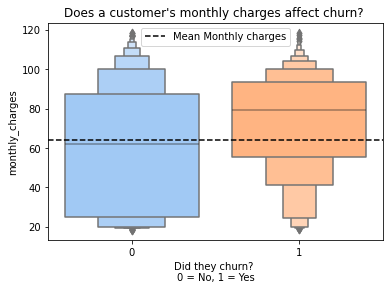

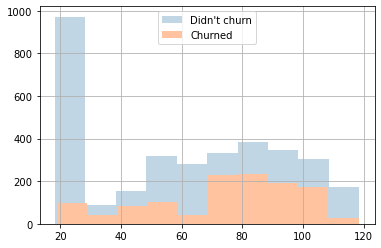

In [13]:
e.monthly_charges_viz(train)

**It looks like those who churn have higher monthly charges**

**In order to confirm this prediction, I will now do a T-test to test if monthly charges of those who churn are higher than those who don't churn**
* My confidence interval is 95%
* Resulting alpha is .05

In [9]:
alpha = 0.05

**To run a T-test we have to check our assumptions**
* **Independent:** Yes. Two separate groups churn and no_churn
* **Normal distribution:** Yes. Enough observations
* **Equal variances:** Check $\Downarrow$

In [14]:
stats.levene(train_churn.monthly_charges, train_no_churn.monthly_charges)

LeveneResult(statistic=248.35641580913386, pvalue=1.5798656854889806e-54)

pvalue < alpha so they are NOT equal and we must use equal_var = False

$H_0$ = Monthly charges of those who churn $\leq$ monthly charges of those who don't churn

$H_a$ = Monthly charges of those who churn $>$ monthly charges of those who don't churn

In [ ]:
tstat, p = stats.ttest_ind(train_churn.monthly_charges, train_no_churn.monthly_charges, equal_var= False)

In [15]:
if (p/2 < alpha):
    print(f"tstat: {tstat}\np-value: {p}\np < alpha, so we can reject the null hypothesis and say monthly charges of those who churn are higher than those who don't churn.")
else:
    print(f"tstat: {tstat}\np-value: {p}\np > alpha, so we fail to reject the null hypothesis and say monthly charges of those who churn are not higher than those who don't churn.")

tstat: -29.127546311454513
p-value: 6.457343935652863e-162
p < alpha, so we can reject the null hypothesis and say monthly charges of those who churn are higher than those who don't churn.


**Those who have higher monthly charges are probably more likely to churn.**

## Does contract type affect churn?

In [ ]:
sns.barplot(x="contract_type", y="churn_encoded", data=train, palette='pastel')
rate = train["churn_encoded"].mean()
plt.axhline(rate, label = f'Average churn rate', linestyle='--', color='black')
plt.legend()
plt.show()

$H_0$ = Contract type is independent of churn

$H_a$ = Contract type is dependent on churn

In [ ]:
alpha = 0.05

In [ ]:
observed = pd.crosstab(train["contract_type"], train["churn_encoded"])
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

In [ ]:
if (p < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

**Contract type is dependent on churn**

## Do those with no tech support churn more?

In [ ]:
sns.barplot(x="tech_support", y="churn_encoded", data=train, palette='pastel')
rate = train["churn_encoded"].mean()
plt.axhline(rate, label = f'Average churn rate', linestyle='--', color='black')
plt.legend()
plt.show()

$H_0$ = There is no relationship between having tech support and churn.

$H_a$ = There is a relationship between having tech support and churn.

**Independent:** Yes. Two separate groups churn and no_churn

**Normal distribution:** Yes. Enough observations

**Equal variances:** Check $\Downarrow$

In [ ]:
alpha = 0.05

In [ ]:
observed = pd.crosstab(train["tech_support"], train["churn_encoded"])
observed

In [ ]:
chi2, p, degf, expected = stats.chi2_contingency(observed)

In [ ]:
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2}')
print(f'p     = {p}')

In [ ]:
if (p < alpha):
    print("we can reject the null hypothesis")
else:
    print('We fail to reject the null hypothesis')

### 4) Answer to the question
* Answer the question you posed of the data by referring to the chart and statistical test (if you used one)
* If the question relates to drivers, explain why the feature in question would/wouldn't make a good driver

**There is a relationship between having tech support and churn.**

## Exploration Summary
* After your explore section, before you start modeling, provide a summary of your findings in Explore
* Include a summary of your take-aways
* Include a summary of the features you examined and weather or not you will be going to Modeling with each feature and why
* It is important to note which features will be going into your model so the reader knows what features you are using to model on

### Features I'm moving on with
* "tenure"
* "monthly_charges"
* "contract_type"

In [ ]:
drivers =['churn_encoded', 'contract_type', 'monthly_charges', 'tenure']

# Modeling

### Introduction
* Explain how you will be evaluating your models
* Include the evaluation metric you will be using and why you have chosen it
* Create a baseline and briefly explain how it was calculated 

In [ ]:
X_train, y_train, X_validate, y_validate, X_test, y_test = w.prep_for_model(train, validate, test, "churn_encoded", drivers)

In [ ]:
#baseline based on the percentage of the mode
baseline = y_train.value_counts(normalize=True).max()
print(f'Baseline accuracy: {baseline:.2%}')

### Best 3 Models
* Show the three best model results obtained using your selected features to predict the target variable
* Typically students will show the top models they are able to generate for three different model types

## You may use this as a template for how to introduce your models:

### Decision Tree

In [ ]:
# Decision tree results 
# create classifier object
clf = DecisionTreeClassifier(max_depth=3, random_state=27)

#fit model on training data
clf.fit(X_train, y_train)

print("Decision Tree")
print(f"Train Accuracy: {clf.score(X_train, y_train)}")
print(f"Validate Accuracy: {clf.score(X_validate, y_validate)}")

### Random Forest

In [ ]:
#Random forest results
# create classifier object
rf = RandomForestClassifier(max_depth=4, random_state=27)

#fit model on training data
rf.fit(X_train, y_train)

#print results
print('Random Forest')
print(f"Train Accuracy: {rf.score(X_train, y_train)}")
print(f"Validate Accuracy: {rf.score(X_validate, y_validate)}")

### KNN

In [ ]:
# create classifier object
knn = KNeighborsClassifier()

#fit model on training data
knn.fit(X_train, y_train)

#print results
print('KNN')
print(f"Train Accuracy: {knn.score(X_train, y_train)}")
print(f"Validate Accuracy: {knn.score(X_validate, y_validate)}", '\n')

### Logistic Regression

In [ ]:
#Logistic regression results
# create classifier object
logit = LogisticRegression(random_state=27)

#fit model on training data
logit.fit(X_train, y_train)

#print results
print('Logistic Regression')
print(f"Train Accuracy: {logit.score(X_train, y_train)}")
print(f"Validate Accuracy: {logit.score(X_validate, y_validate)}")

### Test Model
* Choose the best model out of the three as you best model and explain why you have chosen it
* Explain that you will now run your final model on test data to gauge how it will perform on unseen data

In [ ]:
# Code that runs the best overall model on test data (this may be imported from a module)
#print('?????')
print(f"Test Accuracy: {clf.score(X_test, y_test)}")

### Modeling Wrap 
* Give a final interpretation of how the models test score compares to the baseline and weather you would recommend this model for production

## Conclusion

### Summary
* Summarize your findings and answer the questions you brought up in explore 
* Summarize how drivers discovered lead or did not lead to a successful model 

### Recommendations
* Recommendations are actions the stakeholder should take based on your insights

### Next Steps
* Next Steps are what you, as a Data Scientist, would do if provided more time to work on the project

**Where there is code in your report there should also be code comments telling the reader what each code block is doing. This is true for any and all code blocks even if you are using a function to import code from a module.**
<br>
<br>
**Your Notebook should contain adequate markdown that documents your thought process, decision making, and navigation through the pipeline. As a Data Scientist, your job does not end with making data discoveries. It includes effectively communicating those discoveries as well. This means documentation is a critical part of your job.**